Neural network for classification problem.
- binary
- multi class
- multi label

In [1]:
# Generate data

from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)


In [2]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


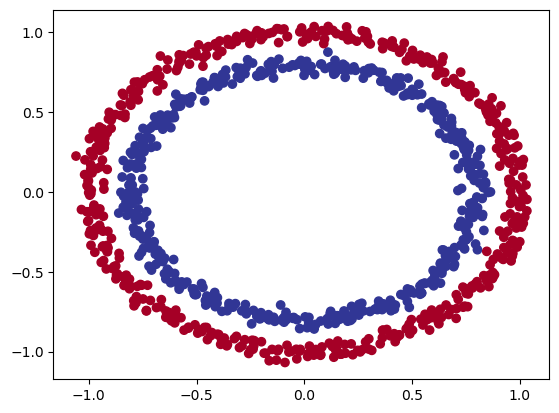

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [4]:
import tensorflow as tf

In [5]:
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=(1)))
model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(2, activation="softmax"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])


Metal device set to: Apple M1 Pro


2023-02-05 08:25:42.444113: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-05 08:25:42.444709: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# model.fit(X,y, epochs=5, verbose=0)
model.evaluate(X,y)

2023-02-05 08:25:42.596578: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


22/32 [===================>..........] - ETA: 0s - loss: 6.2494 - accuracy: 0.4901

2023-02-05 08:25:42.809541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 6.1976 - accuracy: 0.4870


[6.197585105895996, 0.4870000183582306]

In [7]:
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=(1)))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(2, activation="softmax"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])


In [8]:
# model.fit(X,y, epochs=100, verbose=0)
model.evaluate(X,y)

24/32 [=====================>........] - ETA: 0s - loss: 4.4262 - accuracy: 0.4648

2023-02-05 08:25:43.195706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 4.3707 - accuracy: 0.4720


[4.370724678039551, 0.47200003266334534]

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(2)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation="softmax"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])
# model.fit(X,y, epochs=5, verbose=0)
model.evaluate(X,y)

23/32 [====================>.........] - ETA: 0s - loss: 0.6964 - accuracy: 0.4864

2023-02-05 08:25:43.547274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 0.7009 - accuracy: 0.5000


[0.7008938789367676, 0.5]

In [10]:
X_train, X_test = X[:600], X[600:]
y_train, y_test = y[:600], y[600:]

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(2)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="softmax"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])
# model.fit(X_train,y_train, epochs=50, verbose=0)
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.5350


2023-02-05 08:25:43.933534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.6949163675308228, 0.5349999666213989]

Didn't work yet.
Trick didn't work

Visualise, Visualise, Visualise

Visualise predictions

In [12]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(2)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
# model.fit(X,y, epochs=100, verbose=0)
model.evaluate(X,y)


# # Set random seed
# tf.random.set_seed(42)

# # 1. Create the model (this time 3 layers)
# model_3 = tf.keras.Sequential([
#   # Before TensorFlow 2.7.0
#   # tf.keras.layers.Dense(100), # add 100 dense neurons

#   # With TensorFlow 2.7.0
#   # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

#   ## After TensorFlow 2.8.0 ##
#   tf.keras.layers.Dense(100), # add 100 dense neurons
#   tf.keras.layers.Dense(10), # add another layer with 10 neurons
#   tf.keras.layers.Dense(1)
# ])

# # 2. Compile the model
# model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
#                 metrics=['accuracy'])

# # 3. Fit the model
# model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

24/32 [=====================>........] - ETA: 0s - loss: 4.2518 - accuracy: 0.5052

2023-02-05 08:25:44.280551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 4.3685 - accuracy: 0.5000


[4.368525505065918, 0.5]

In [13]:
model.predict(X)[0]

32/32 [==============================] - 0s 2ms/step


2023-02-05 08:25:44.563896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([0.25793412], dtype=float32)

plot decision boundary
numpy mesh grid

In [14]:
import numpy as np

def plot_decision_boundary(model, X,y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(),yy.ravel()]
    
    y_pred = model.predict(x_in)
    
#     for multi class
    if len(y_pred[0])>1:
        print("this is multi class")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
binary classification


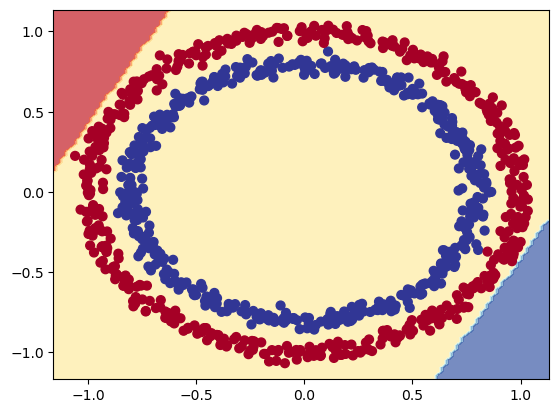

In [15]:
plot_decision_boundary(model,X, y)

In [16]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression =tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [17]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['mae'])

# 3. Fit the model
# model_3.fit(tf.expand_dims(X_reg_train,axis=1), tf.expand_dims(y_reg_train,axis=1), epochs=100, verbose=1) # fit for 100 passes of the data

2/2 [==============================] - 0s 11ms/step


2023-02-05 08:25:45.474165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


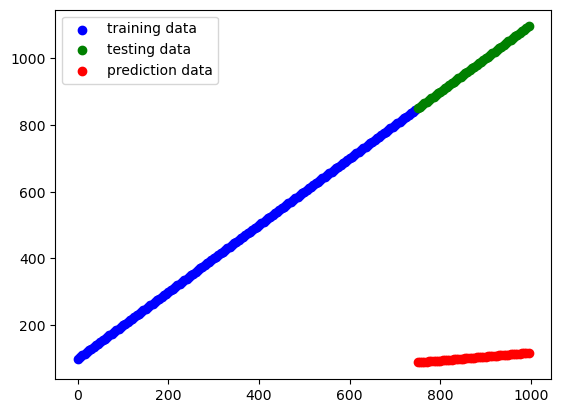

In [18]:
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test,axis=1))

# plt.figure(figure=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="prediction data")
plt.legend()

## Missing piece is non lienarity


In [19]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(2)))
model.add(tf.keras.layers.Dense(1, activation="linear"))


model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])
# history = model.fit(X,y, epochs=100, verbose=1)


/Users/sanjeevhalyal/.conda/envs/MachineLearning-3.8/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


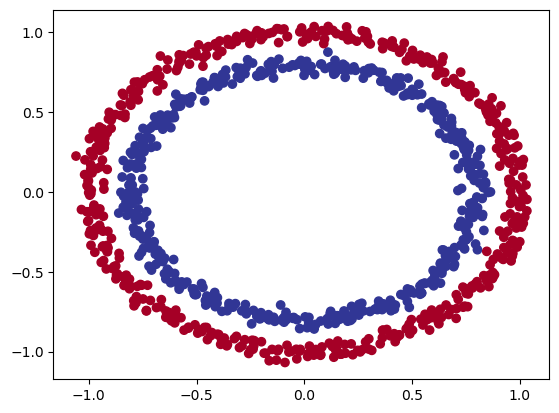

In [20]:
plt.scatter(X[:,0],X[:,1], c=y, cmap="RdYlBu")

 35/313 [==>...........................] - ETA: 0s

2023-02-05 08:25:45.710982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
binary classification


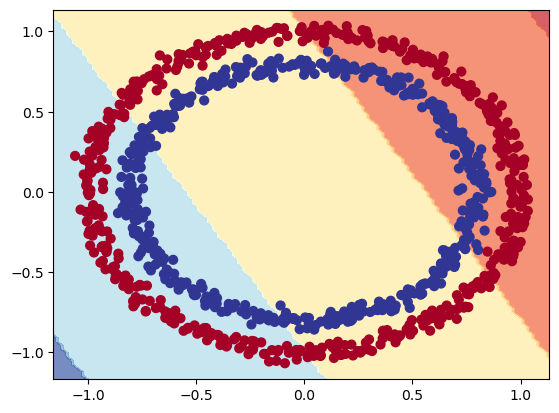

In [21]:
plot_decision_boundary(model,X, y)

In [22]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation="relu"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])
# history = model.fit(X,y, epochs=250, verbose=1)


In [23]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])
# history = model.fit(X,y, epochs=100, verbose=1)

In [24]:
model.evaluate(X,y)

22/32 [===================>..........] - ETA: 0s - loss: 1.8448 - accuracy: 0.5099

2023-02-05 08:25:46.444958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 1.8687 - accuracy: 0.5000


[1.868704080581665, 0.5]

 87/313 [=======>......................] - ETA: 0s

2023-02-05 08:25:46.737444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
binary classification


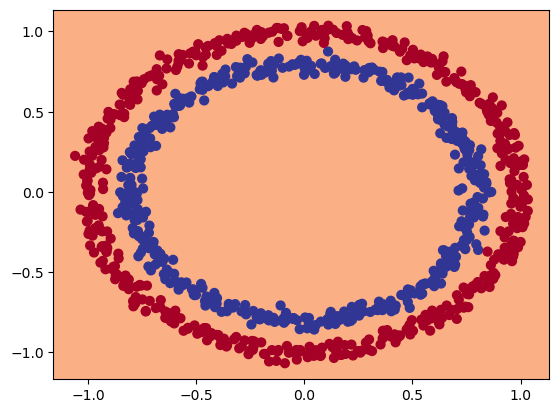

In [25]:
plot_decision_boundary(model,X, y)


In [26]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])
# history = model.fit(X,y, epochs=100, verbose=1)

In [27]:
model.evaluate(X,y)

25/32 [======================>.......] - ETA: 0s - loss: 0.7004 - accuracy: 0.4988

2023-02-05 08:25:47.589229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 0.7046 - accuracy: 0.5000


[0.7046026587486267, 0.5]

 86/313 [=======>......................] - ETA: 0s

2023-02-05 08:25:47.861853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
binary classification


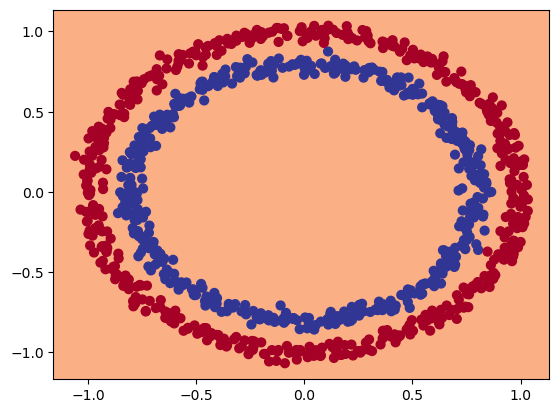

In [28]:
plot_decision_boundary(model,X, y)

In [29]:
X_train, X_test = X[:600], X[600:]
y_train, y_test = y[:600], y[600:]

In [30]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])
# history = model.fit(X_train,y_train, epochs=250, verbose=1)

In [31]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 7ms/step - loss: 0.6946 - accuracy: 0.4725


2023-02-05 08:25:48.727470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.69463711977005, 0.4724999964237213]

2023-02-05 08:25:48.915916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
binary classification


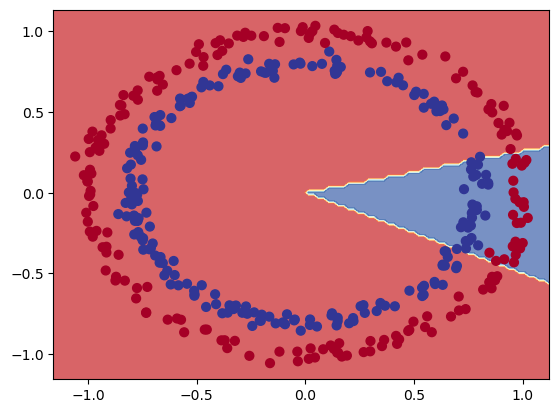

In [32]:
plot_decision_boundary(model,X_test,y_test)

In [33]:
# history = model.fit(X_train,y_train, epochs=250, verbose=1)

In [34]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.4725


[0.69463711977005, 0.4724999964237213]

313/313 [==============================] - 1s 2ms/step
binary classification


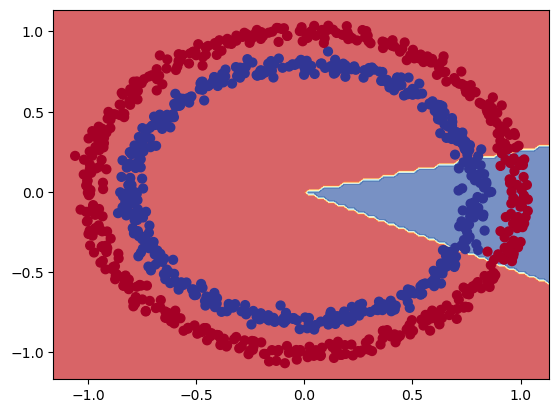

In [35]:
plot_decision_boundary(model,X,y)

In [36]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

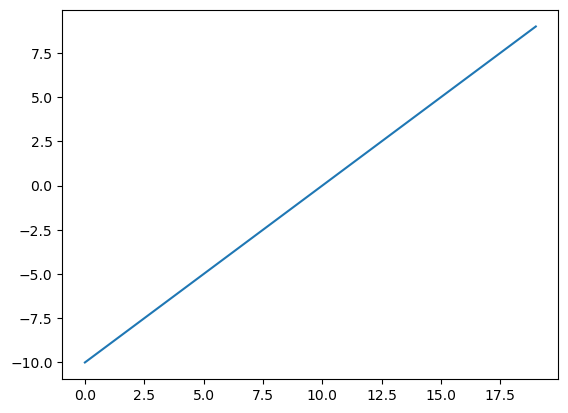

In [37]:
plt.plot(A)

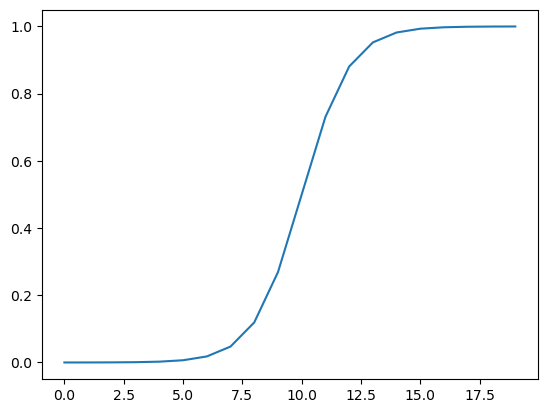

In [38]:
def sigmoid(x):
    return 1/ (1+ tf.exp(-x))
    
plt.plot(sigmoid(A))

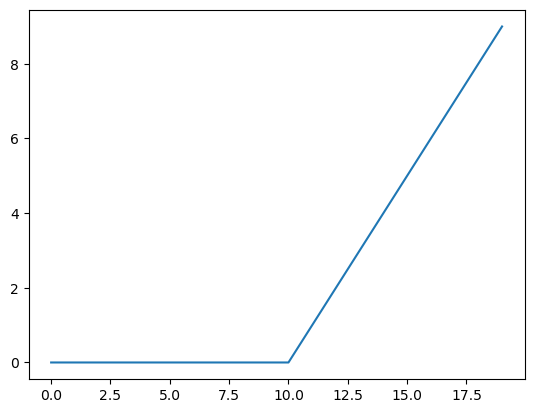

In [39]:
def relu(x):
    return tf.math.maximum(x,0)
plt.plot(relu(A))

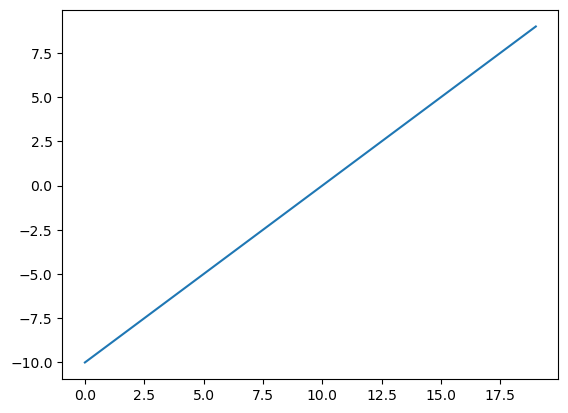

In [40]:
plt.plot(tf.keras.activations.linear(A))

In [41]:
history.history

NameError: name 'history' is not defined

In [42]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [43]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 4)                 12        
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [44]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=["accuracy"])

In [45]:
# history = model.fit(X_train, y_train, epochs=25)

In [46]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 11ms/step - loss: 0.7606 - accuracy: 0.4400


2023-02-05 08:26:24.989868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.7605755925178528, 0.4399999976158142]

  1/313 [..............................] - ETA: 11s

2023-02-05 08:26:25.169711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
binary classification


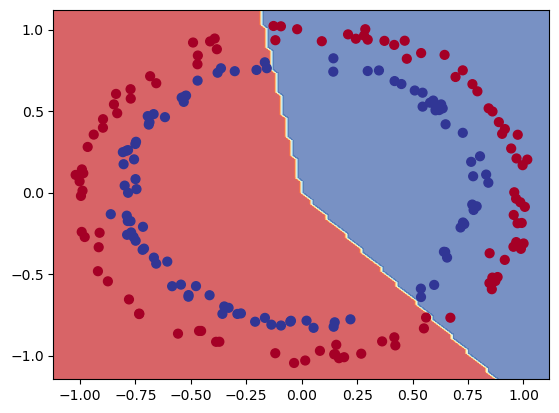

In [47]:
plot_decision_boundary(model,X_test,y_test)

313/313 [==============================] - 1s 2ms/step
binary classification
313/313 [==============================] - 1s 2ms/step
binary classification


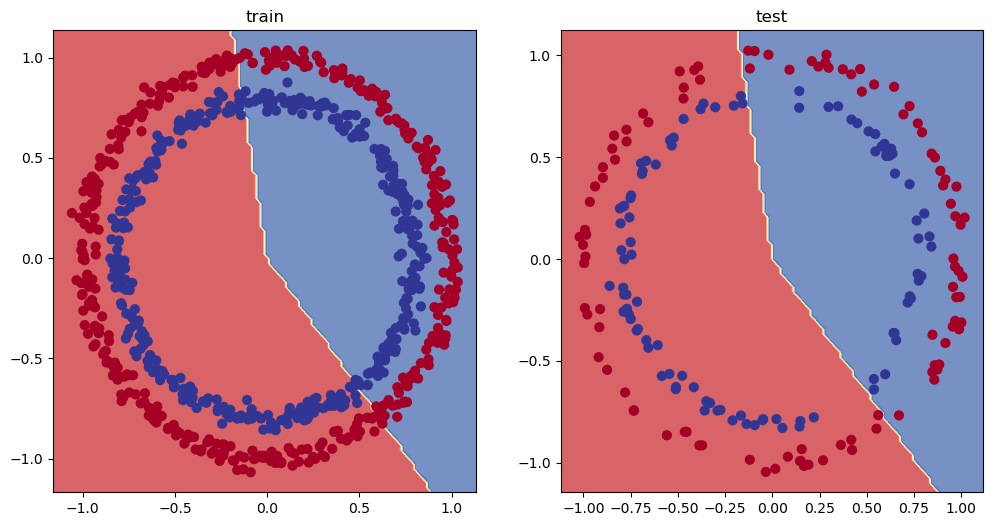

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model,X_test,y_test)

In [49]:
history.history

NameError: name 'history' is not defined

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("loss curve")

*Note:*
loss going down is improvements in predictions


# Find best learning rate

to find best learning rate:
- learning rate callback
- model
- modifiy loss curve rate

In [69]:
tf.random.set_seed(42)
model2= tf.keras.Sequential([
tf.keras.layers.Dense(4, activation="relu"),
tf.keras.layers.Dense(4, activation="relu"),
tf.keras.layers.Dense(1, activation="sigmoid")])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer="Adam", metrics=["accuracy"] )


    

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [70]:
history = model2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
10/25 [===========>..................] - ETA: 0s - loss: 0.7210 - accuracy: 0.5031

2023-02-05 08:27:53.580625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 6ms/step - loss: 0.7205 - accuracy: 0.5225 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7196 - accuracy: 0.5225 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7188 - accuracy: 0.5200 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7178 - accuracy: 0.5200 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7168 - accuracy: 0.5175 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7158 - accuracy: 0.5188 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7147 - accuracy: 0.5200 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7136 - accuracy: 0.5200 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7124 - ac

<AxesSubplot:xlabel='epochs'>

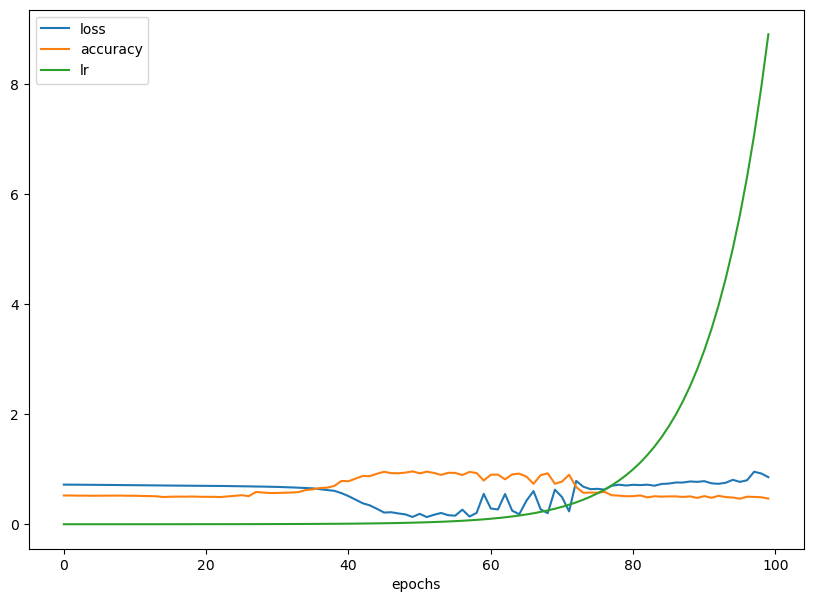

In [71]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")


In [72]:
lrs = 1e-4 * 10**(tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'learning rate vs loss')

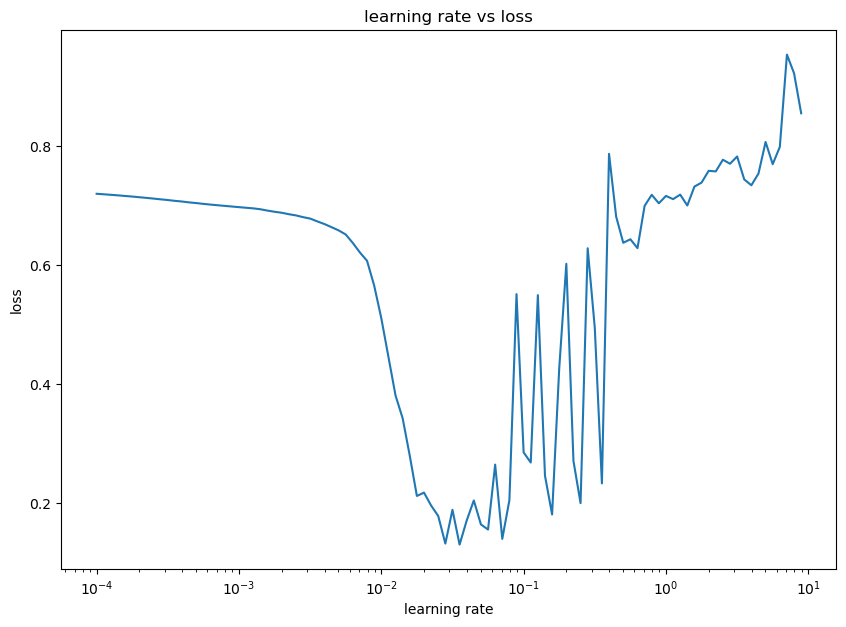

In [73]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [75]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.02), metrics=["accuracy"])

In [76]:
history = model.fit(X_train, y_train, epochs=40)

Epoch 1/40
 9/25 [=========>....................] - ETA: 0s - loss: 0.6848 - accuracy: 0.5035

2023-02-05 08:28:56.685475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.5550
Epoch 2/40
25/25 [==============================] - 0s 6ms/step - loss: 0.6716 - accuracy: 0.5525
Epoch 3/40
25/25 [==============================] - 0s 6ms/step - loss: 0.6566 - accuracy: 0.5987
Epoch 4/40
25/25 [==============================] - 0s 6ms/step - loss: 0.6329 - accuracy: 0.6362
Epoch 5/40
25/25 [==============================] - 0s 6ms/step - loss: 0.6122 - accuracy: 0.6762
Epoch 6/40
25/25 [==============================] - 0s 6ms/step - loss: 0.5816 - accuracy: 0.7088
Epoch 7/40
25/25 [==============================] - 0s 6ms/step - loss: 0.5382 - accuracy: 0.7738
Epoch 8/40
25/25 [==============================] - 0s 7ms/step - loss: 0.4777 - accuracy: 0.8125
Epoch 9/40
25/25 [==============================] - 0s 7ms/step - loss: 0.4342 - accuracy: 0.8462
Epoch 10/40
25/25 [==============================] - 0s 6ms/step - loss: 0.3677 - accuracy: 0.8812
Epoch 11/40
25/25 [===========

<AxesSubplot:xlabel='epochs'>

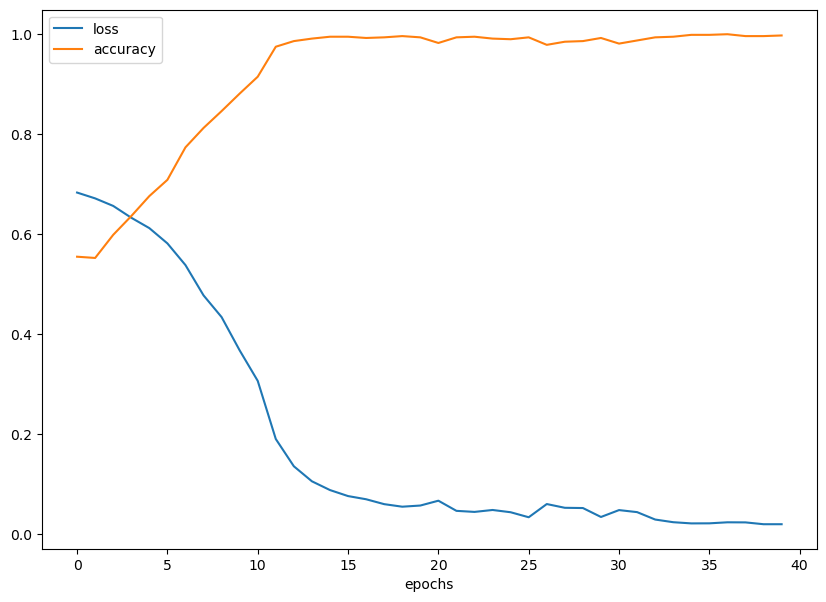

In [77]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

In [78]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 11ms/step - loss: 0.0317 - accuracy: 0.9850


2023-02-05 08:29:07.600513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.03171501308679581, 0.98499995470047]

 82/313 [======>.......................] - ETA: 0s

2023-02-05 08:29:08.568818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
binary classification


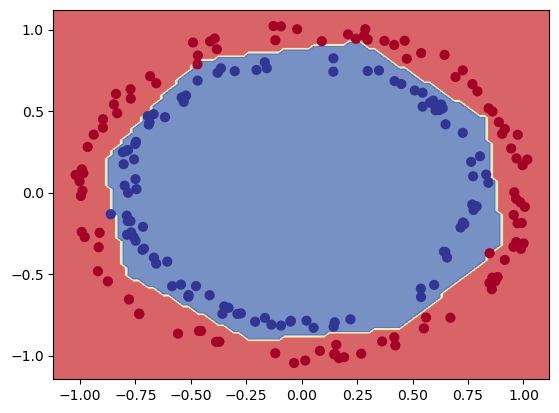

In [79]:
plot_decision_boundary(model,X_test,y_test)

313/313 [==============================] - 1s 2ms/step
binary classification
313/313 [==============================] - 1s 2ms/step
binary classification


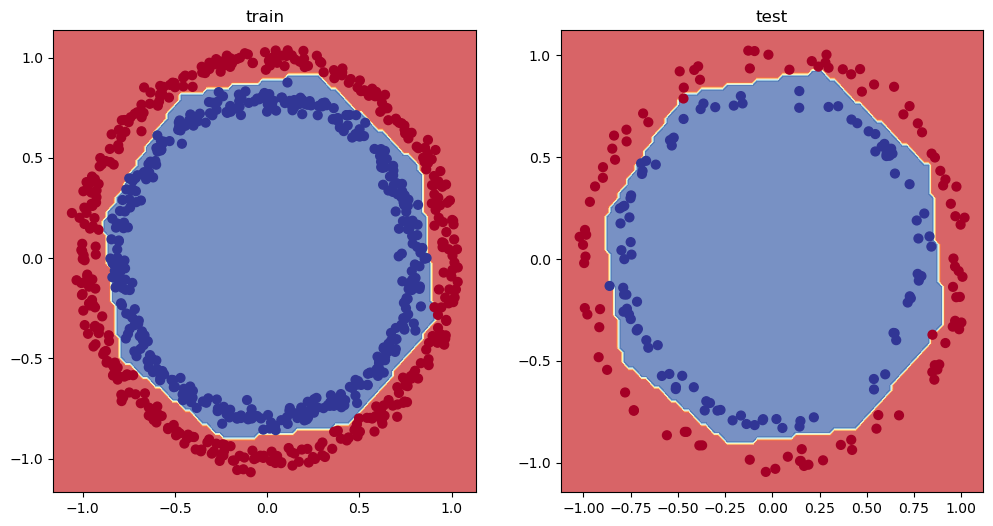

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model,X_test,y_test)

In [86]:
# check accuracy

loss, accuracy = model.evaluate(X_test, y_test)

y_preds = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [82]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 1, 98]])

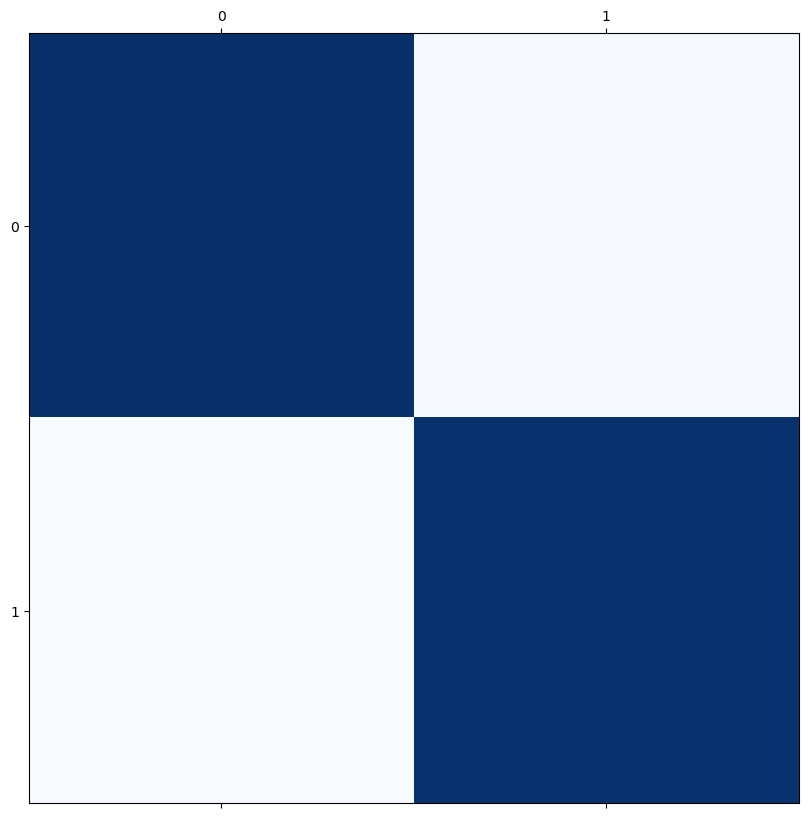

In [109]:

figsize = (10,10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]


n_classes = cm.shape[0]

fig, axs = plt.subplots(figsize=figsize)
cmx =  axs.matshow(cm, cmap=plt.cm.Blues)

# fig.colorbar(cax)

classes = False
# not intreseted in this


# Mulit class classification


When you have more than two classes, it called multi class classification.

In [310]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [311]:
#  Show first training example

print(type(train_data))
print(f"Traning data {train_data[0]}")
print(f"Traning label {train_labels[0]}")

<class 'numpy.ndarray'>
Traning data [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0  

In [117]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

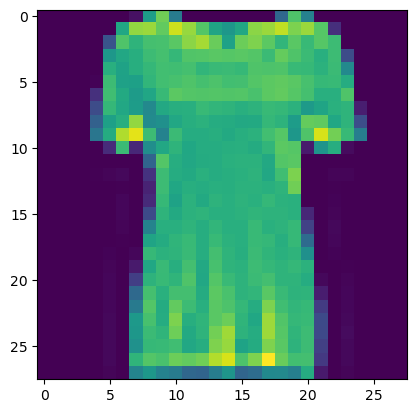

In [121]:
import matplotlib.pyplot as plt
plt.imshow(train_data[10])

In [122]:
train_labels[10]

0

In [123]:
class_names = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Pullover')

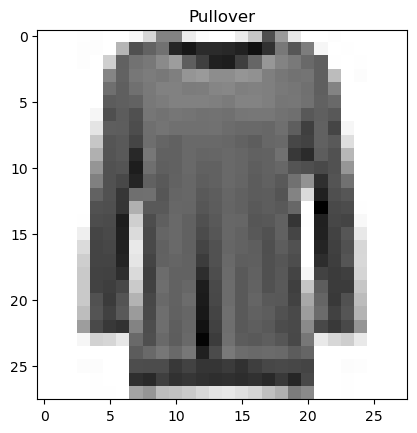

In [130]:
index_of_choice = 199
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

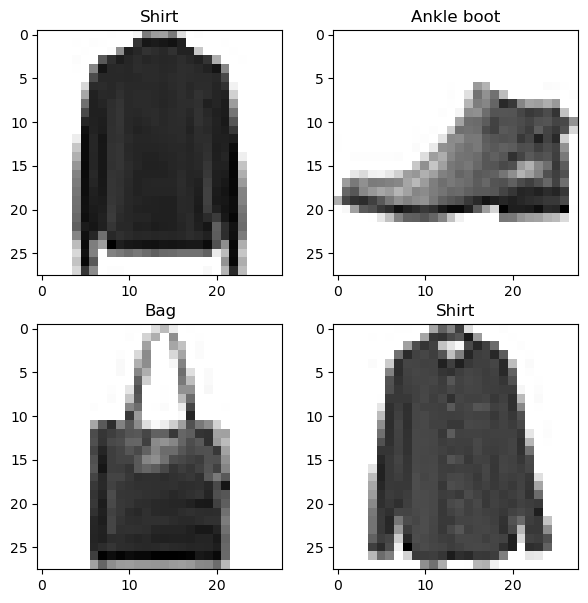

In [165]:
import random
 
plt.figure(figsize=(7,7))
    
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis= "off"
 
 

In [204]:
tf.random.set_seed(42)
model_MCC = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    
])
model_MCC.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [205]:
model_MCC.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_79 (Dense)            (None, 4)                 3140      
                                                                 
 dense_80 (Dense)            (None, 4)                 20        
                                                                 
 dense_81 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [206]:
tf.one_hot(test_labels, depth=10)[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)>

In [207]:


history = model_MCC.fit(train_data/255.0, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data/255.0, tf.one_hot(test_labels, depth=10)))



Epoch 1/10
  13/1875 [..............................] - ETA: 16s - loss: 2.2850 - accuracy: 0.1082

2023-02-05 19:25:37.923520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 1.2018 - accuracy: 0.5958

2023-02-05 19:25:53.504733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 9ms/step - loss: 1.2010 - accuracy: 0.5961 - val_loss: 0.8246 - val_accuracy: 0.7479
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7376 - accuracy: 0.7656 - val_loss: 0.7352 - val_accuracy: 0.7593
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6620 - accuracy: 0.7819 - val_loss: 0.6661 - val_accuracy: 0.7753
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6300 - accuracy: 0.7907 - val_loss: 0.6461 - val_accuracy: 0.7807
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6135 - accuracy: 0.7930 - val_loss: 0.6387 - val_accuracy: 0.7826
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6012 - accuracy: 0.7970 - val_loss: 0.6329 - val_accuracy: 0.7860
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5943 - accuracy: 0.7999 - val_loss: 0.6429 - val_accuracy: 0.7

<AxesSubplot:xlabel='epochs'>

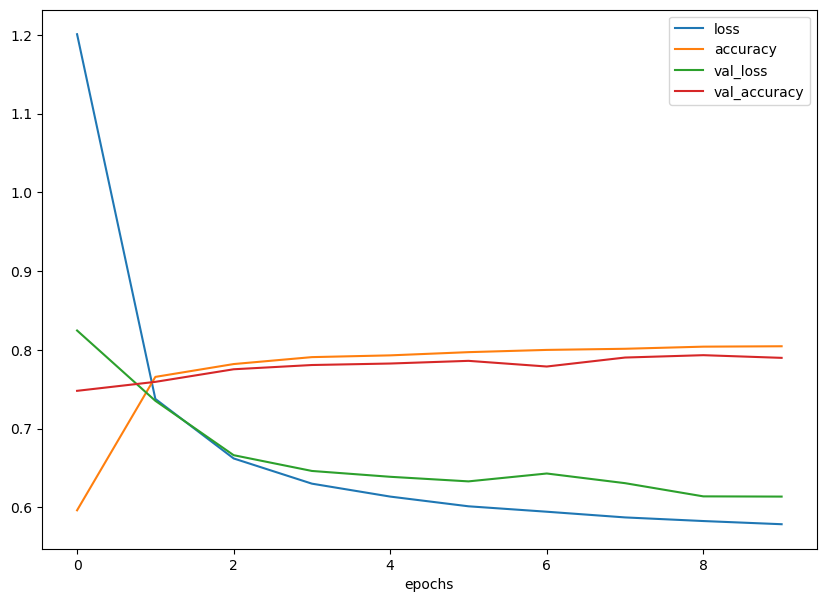

In [208]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

313/313 [==============================] - 3s 8ms/step - loss: 0.6135 - accuracy: 0.7898


[0.6135404109954834, 0.7898000478744507]

In [216]:
tf.random.set_seed(42)
model_MCC2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(4, activation="relu"),
tf.keras.layers.Dense(4, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")])

model_MCC2.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer="Adam", metrics=["accuracy"] )


    

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [218]:
history = model_MCC2.fit(train_data/255.0, tf.one_hot(train_labels, depth=10), epochs=40, callbacks=[lr_scheduler], validation_data=(test_data/255.0, tf.one_hot(test_labels, depth=10)))

Epoch 1/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6710 - accuracy: 0.7590 - val_loss: 0.6426 - val_accuracy: 0.7763 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5997 - accuracy: 0.7905 - val_loss: 0.6640 - val_accuracy: 0.7697 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5650 - accuracy: 0.8047 - val_loss: 0.6011 - val_accuracy: 0.7860 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5487 - accuracy: 0.8103 - val_loss: 0.5700 - val_accuracy: 0.8016 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5375 - accuracy: 0.8130 - val_loss: 0.5614 - val_accuracy: 0.8048 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5280 - accuracy: 0.8163 - val_loss: 0.5973 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

In [227]:
lrs = 1e-3 * 10**(tf.range(40)/20)
lrs

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])>

ValueError: x and y must have same first dimension, but have shapes (40,) and (20,)

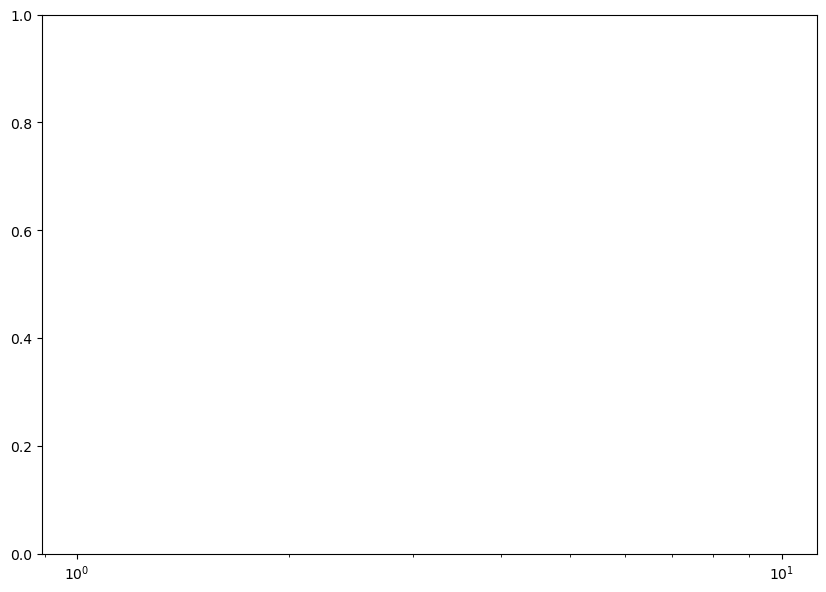

In [228]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")


In [230]:
import time
time.sleep(5)

In [231]:
tf.random.set_seed(42)
model_MCC = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    
])
model_MCC.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [232]:


history = model_MCC.fit(train_data/255.0, tf.one_hot(train_labels, depth=10), epochs=20, validation_data=(test_data/255.0, tf.one_hot(test_labels, depth=10)))



Epoch 1/20
  13/1875 [..............................] - ETA: 16s - loss: 2.2665 - accuracy: 0.0889 

2023-02-05 21:41:42.807642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 1.2360 - accuracy: 0.5481

2023-02-05 21:41:58.565296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 9ms/step - loss: 1.2357 - accuracy: 0.5482 - val_loss: 0.8506 - val_accuracy: 0.6979
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7327 - accuracy: 0.7340 - val_loss: 0.6984 - val_accuracy: 0.7437
Epoch 3/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6442 - accuracy: 0.7709 - val_loss: 0.6580 - val_accuracy: 0.7626
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6130 - accuracy: 0.7834 - val_loss: 0.6287 - val_accuracy: 0.7820
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5961 - accuracy: 0.7912 - val_loss: 0.6347 - val_accuracy: 0.7771
Epoch 6/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5823 - accuracy: 0.7965 - val_loss: 0.6263 - val_accuracy: 0.7784
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5732 - accuracy: 0.7996 - val_loss: 0.6147 - val_accuracy: 0.

In [250]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=8): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [243]:
y_preds = model_MCC.predict(test_data/255.0)

 77/313 [======>.......................] - ETA: 0s

2023-02-05 21:51:40.994736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


array([9, 0, 3, ..., 3, 6, 5])

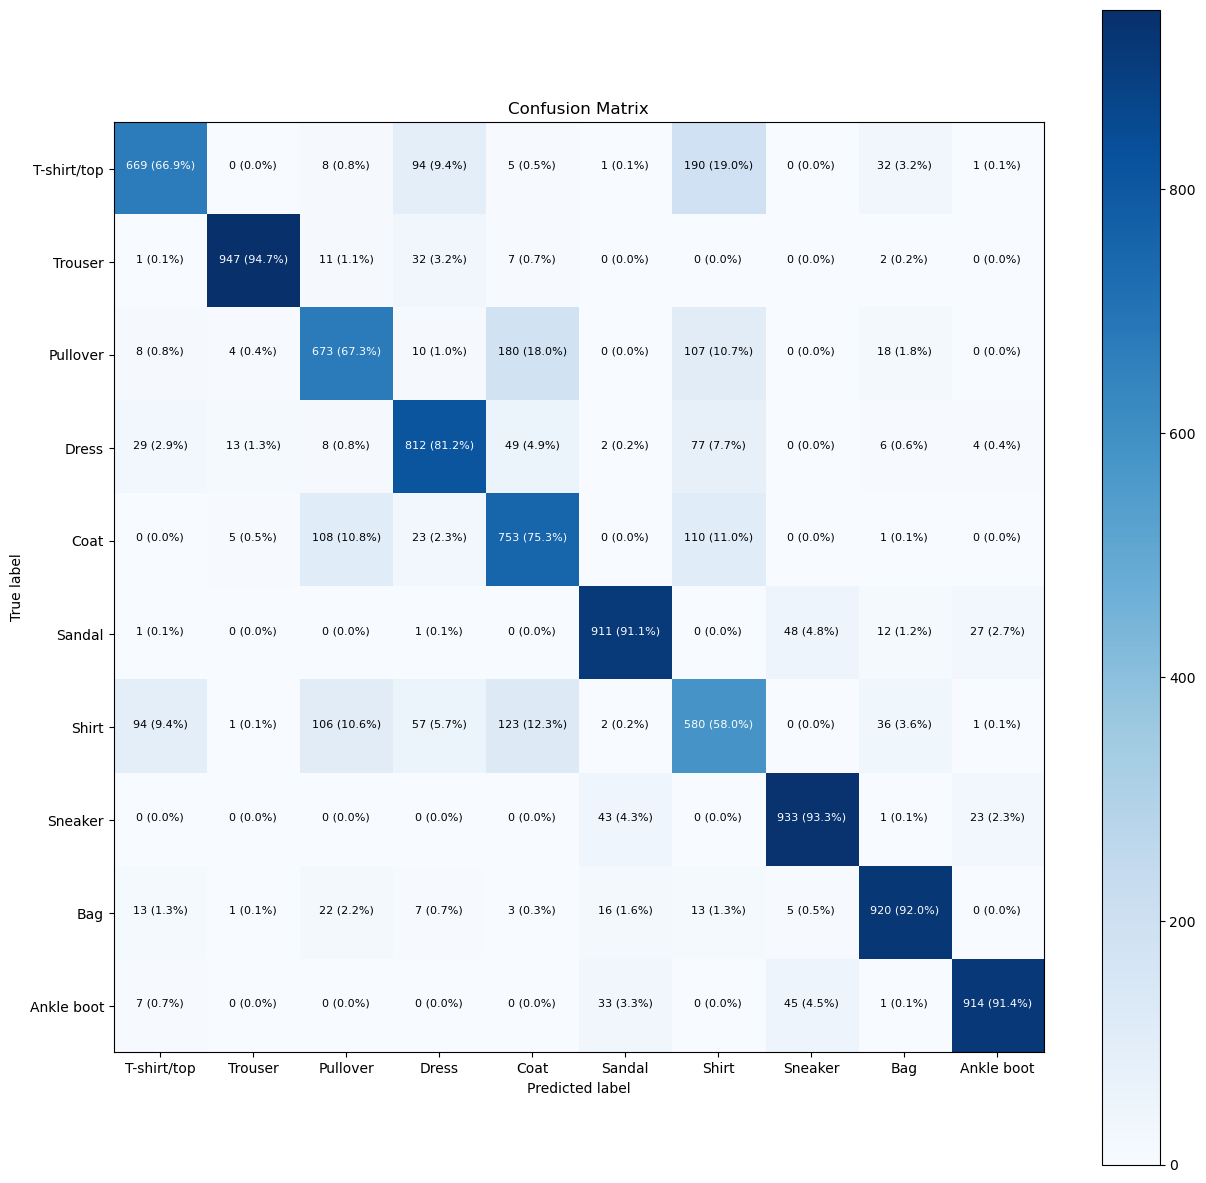

In [252]:
make_confusion_matrix(test_labels, y_preds.argmax(axis=1), classes=class_names)

In [266]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))
    t_image = images[i]
    
    pred_prod = model.predict(t_image.reshape(1,28,28))
    print(pred_prod)
    pred_label = classes[tf.argmax(pred_prod[0])]
    true_label = classes[true_labels[i]]
    
    plt.imshow(t_image, cmap=plt.cm.binary)
    
    if pred_label ==true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_prod), true_label), color=color)
    

1/1 [==============================] - 0s 12ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


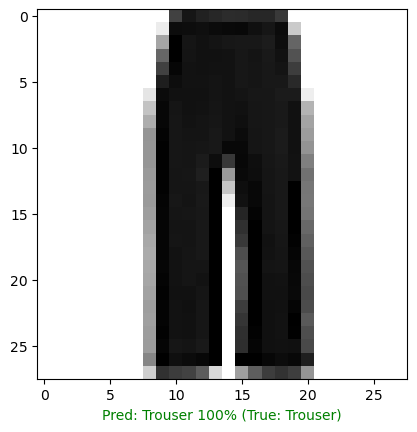

In [303]:
plot_random_image(model_MCC, test_data, test_labels, class_names)

# What are patterns?


In [304]:
model_MCC.layers

In [308]:
weights, bias = model_MCC.layers[1].get_weights()

weights, weights.shape

(array([[ 0.54151   ,  0.5839132 , -0.8934376 , -0.2641219 ],
        [ 0.3416188 ,  1.1178541 , -0.80726385, -0.7144058 ],
        [ 0.35643056,  0.6961124 , -1.0517951 ,  0.46211007],
        ...,
        [ 0.20948578, -0.09597102, -0.15596393, -0.13634378],
        [ 0.5054573 ,  0.22279888,  0.22394536, -0.22071323],
        [ 0.6076408 , -0.03145031, -0.19833301,  0.592651  ]],
       dtype=float32),
 (784, 4))

In [309]:
 bias, bias.shape

(array([ 1.5494168,  0.8877027, -1.1791757,  1.3563157], dtype=float32), (4,))